In [20]:
import urllib.request
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns




In [42]:
column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]
file_path = 'imports-85.txt'  

df = pd.read_csv(file_path, header=None, names=column_names)

#print(df.shape)
#missing_values_count2 = df['horsepower'].eq('?').sum()
#print(missing_values_count2)
df.head(3).transpose()



,0,1,2
symboling,3,3,1
normalized-losses,?,?,?
make,alfa-romero,alfa-romero,alfa-romero
fuel-type,gas,gas,gas
aspiration,std,std,std
num-of-doors,two,two,two
body-style,convertible,convertible,hatchback
drive-wheels,rwd,rwd,rwd
engine-location,front,front,front
wheel-base,88.6,88.6,94.5


1.Поборотися із зниклими даними.

In [43]:

question_marks_count = (df == '?').sum()
print("Кількість '?' у кожній колонці:")
print(question_marks_count)
df = df.drop("normalized-losses", axis=1)
df= df.drop(df[df.isin(['?']).any(axis=1)].index).reset_index(drop =True)
df["price"] = df["price"].astype(int)
df["horsepower"] = df["horsepower"].astype(int)

columns_to_convert = ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'engine-size', 'curb-weight', 'symboling']
for column in columns_to_convert:
    df[column] = df[column].astype(int)

question_marks_count2 = (df == '?').sum()
print()
print("Кількість '?' у кожній колонці:")
print(question_marks_count2)
df.dtypes


Кількість '?' у кожній колонці:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Кількість '?' у кожній колонці:
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

2.Пронормувати вибраний датасет або стандартизувати його

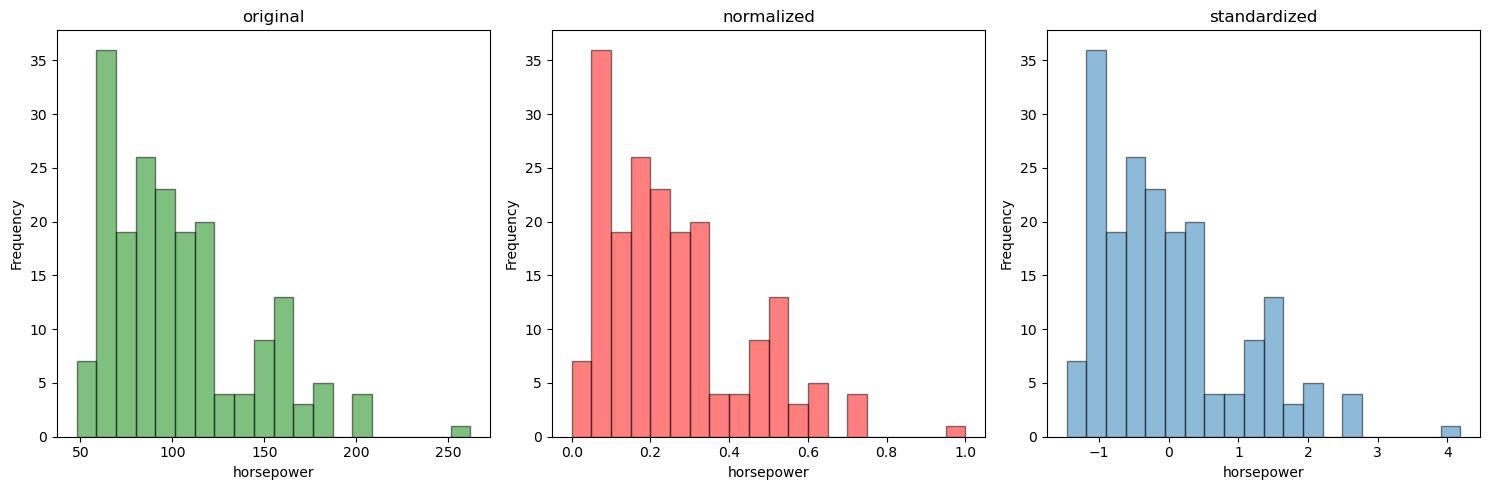

In [44]:
def normalize_data(data):
    min_val = min(data)
    max_val = max(data)
    norm_data = (data - min_val)/(max_val-min_val)
    return norm_data

def standardize_data(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    std_data = (data-mean_val)/std_val
    return std_data

normalized = normalize_data(df["horsepower"])
standardized = standardize_data(df["horsepower"])

#original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(df["horsepower"],bins = 20,alpha=0.5, color="green", edgecolor='black')
plt.title("original")
plt.xlabel("horsepower")
plt.ylabel('Frequency')

#normalized
plt.subplot(1, 3, 2)
plt.hist(normalized,bins = 20,alpha=0.5, color="red", edgecolor='black')
plt.title("normalized")
plt.xlabel("horsepower")
plt.ylabel('Frequency')

#standardized
plt.subplot(1, 3, 3)
plt.hist(standardized,bins = 20,alpha=0.5, edgecolor='black')
plt.title("standardized")
plt.xlabel("horsepower")
plt.ylabel('Frequency')
           
plt.tight_layout()
plt.show()



3.Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

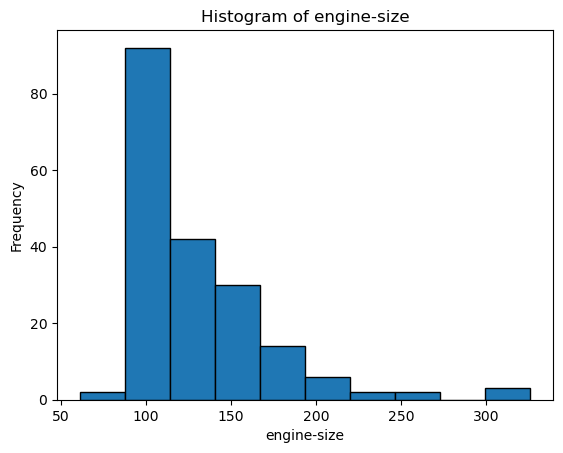

In [18]:
def build_histogram(attribute, num_bins=10):
    plt.hist(df[attribute], bins=num_bins, edgecolor='black')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {attribute}')
    plt.show()

build_histogram('engine-size', num_bins=10)
    

4.Збудувати графік залежності одного integer/real атрибута від іншого.

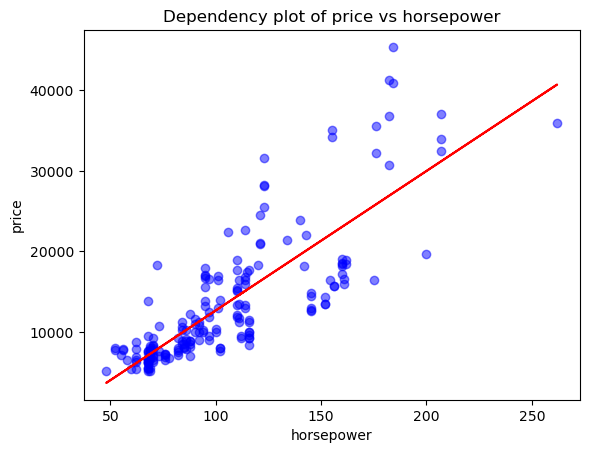

In [26]:
def plot_dependency(x_attribute, y_attribute):
    plt.scatter(df[x_attribute], df[y_attribute], color='blue', alpha=0.5)
    
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(df[x_attribute],df[y_attribute])
    plt.plot(df[x_attribute], slope*df[x_attribute] + intercept, color='red')    
    
    plt.xlabel(x_attribute)
    plt.ylabel(y_attribute)
    plt.title(f'Dependency plot of {y_attribute} vs {x_attribute}')
    plt.show()

plot_dependency('horsepower', 'price')

5.Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [45]:
import scipy.stats as stats

def calculate_correlation(data, attribute1, attribute2):
    pearson_corr, _ = stats.pearsonr(data[attribute1], data[attribute2])
    
    spearman_corr, _ = stats.spearmanr(data[attribute1], data[attribute2])
    
    return pearson_corr, spearman_corr

pearson, spearman = calculate_correlation(df, 'horsepower', 'price')
print("Коефіцієнт Пірсона:", pearson)
print("Коефіцієнт Спірмена:", spearman)


Коефіцієнт Пірсона: 0.8124532046013468
Коефіцієнт Спірмена: 0.8581420258591371


6.Провести One Hot Encoding категоріального string атрибуту.

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[['fuel-type']])

#print(encoder.categories_).toarray()

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['fuel-type']))

df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded.head(5)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,0.0,1.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,0.0,1.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,0.0,1.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,0.0,1.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,0.0,1.0


7)Провести візуалізацію багатовимірних даних, використовуючиприклади, наведені у медіумі

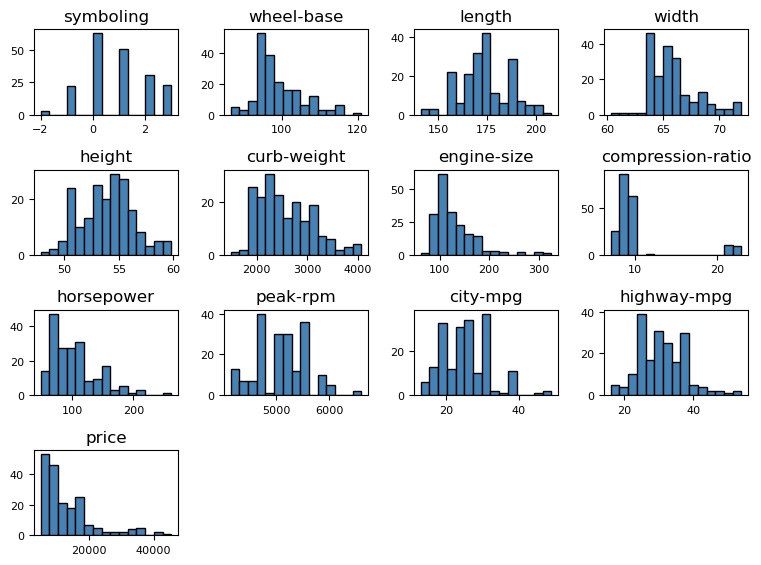

In [65]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

/tmp/ipykernel_3316/3750388336.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


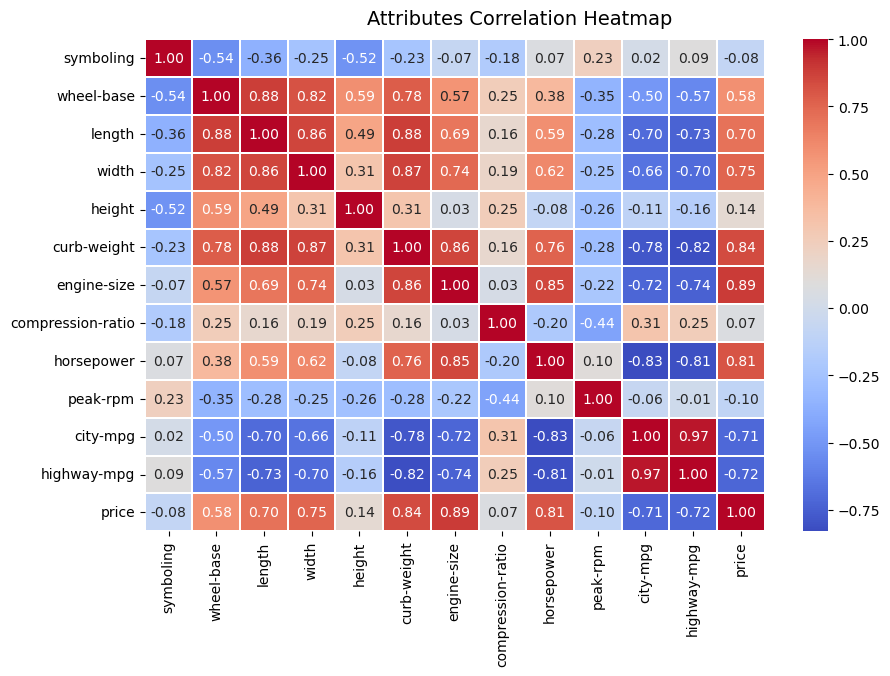

In [67]:
import seaborn as sns

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

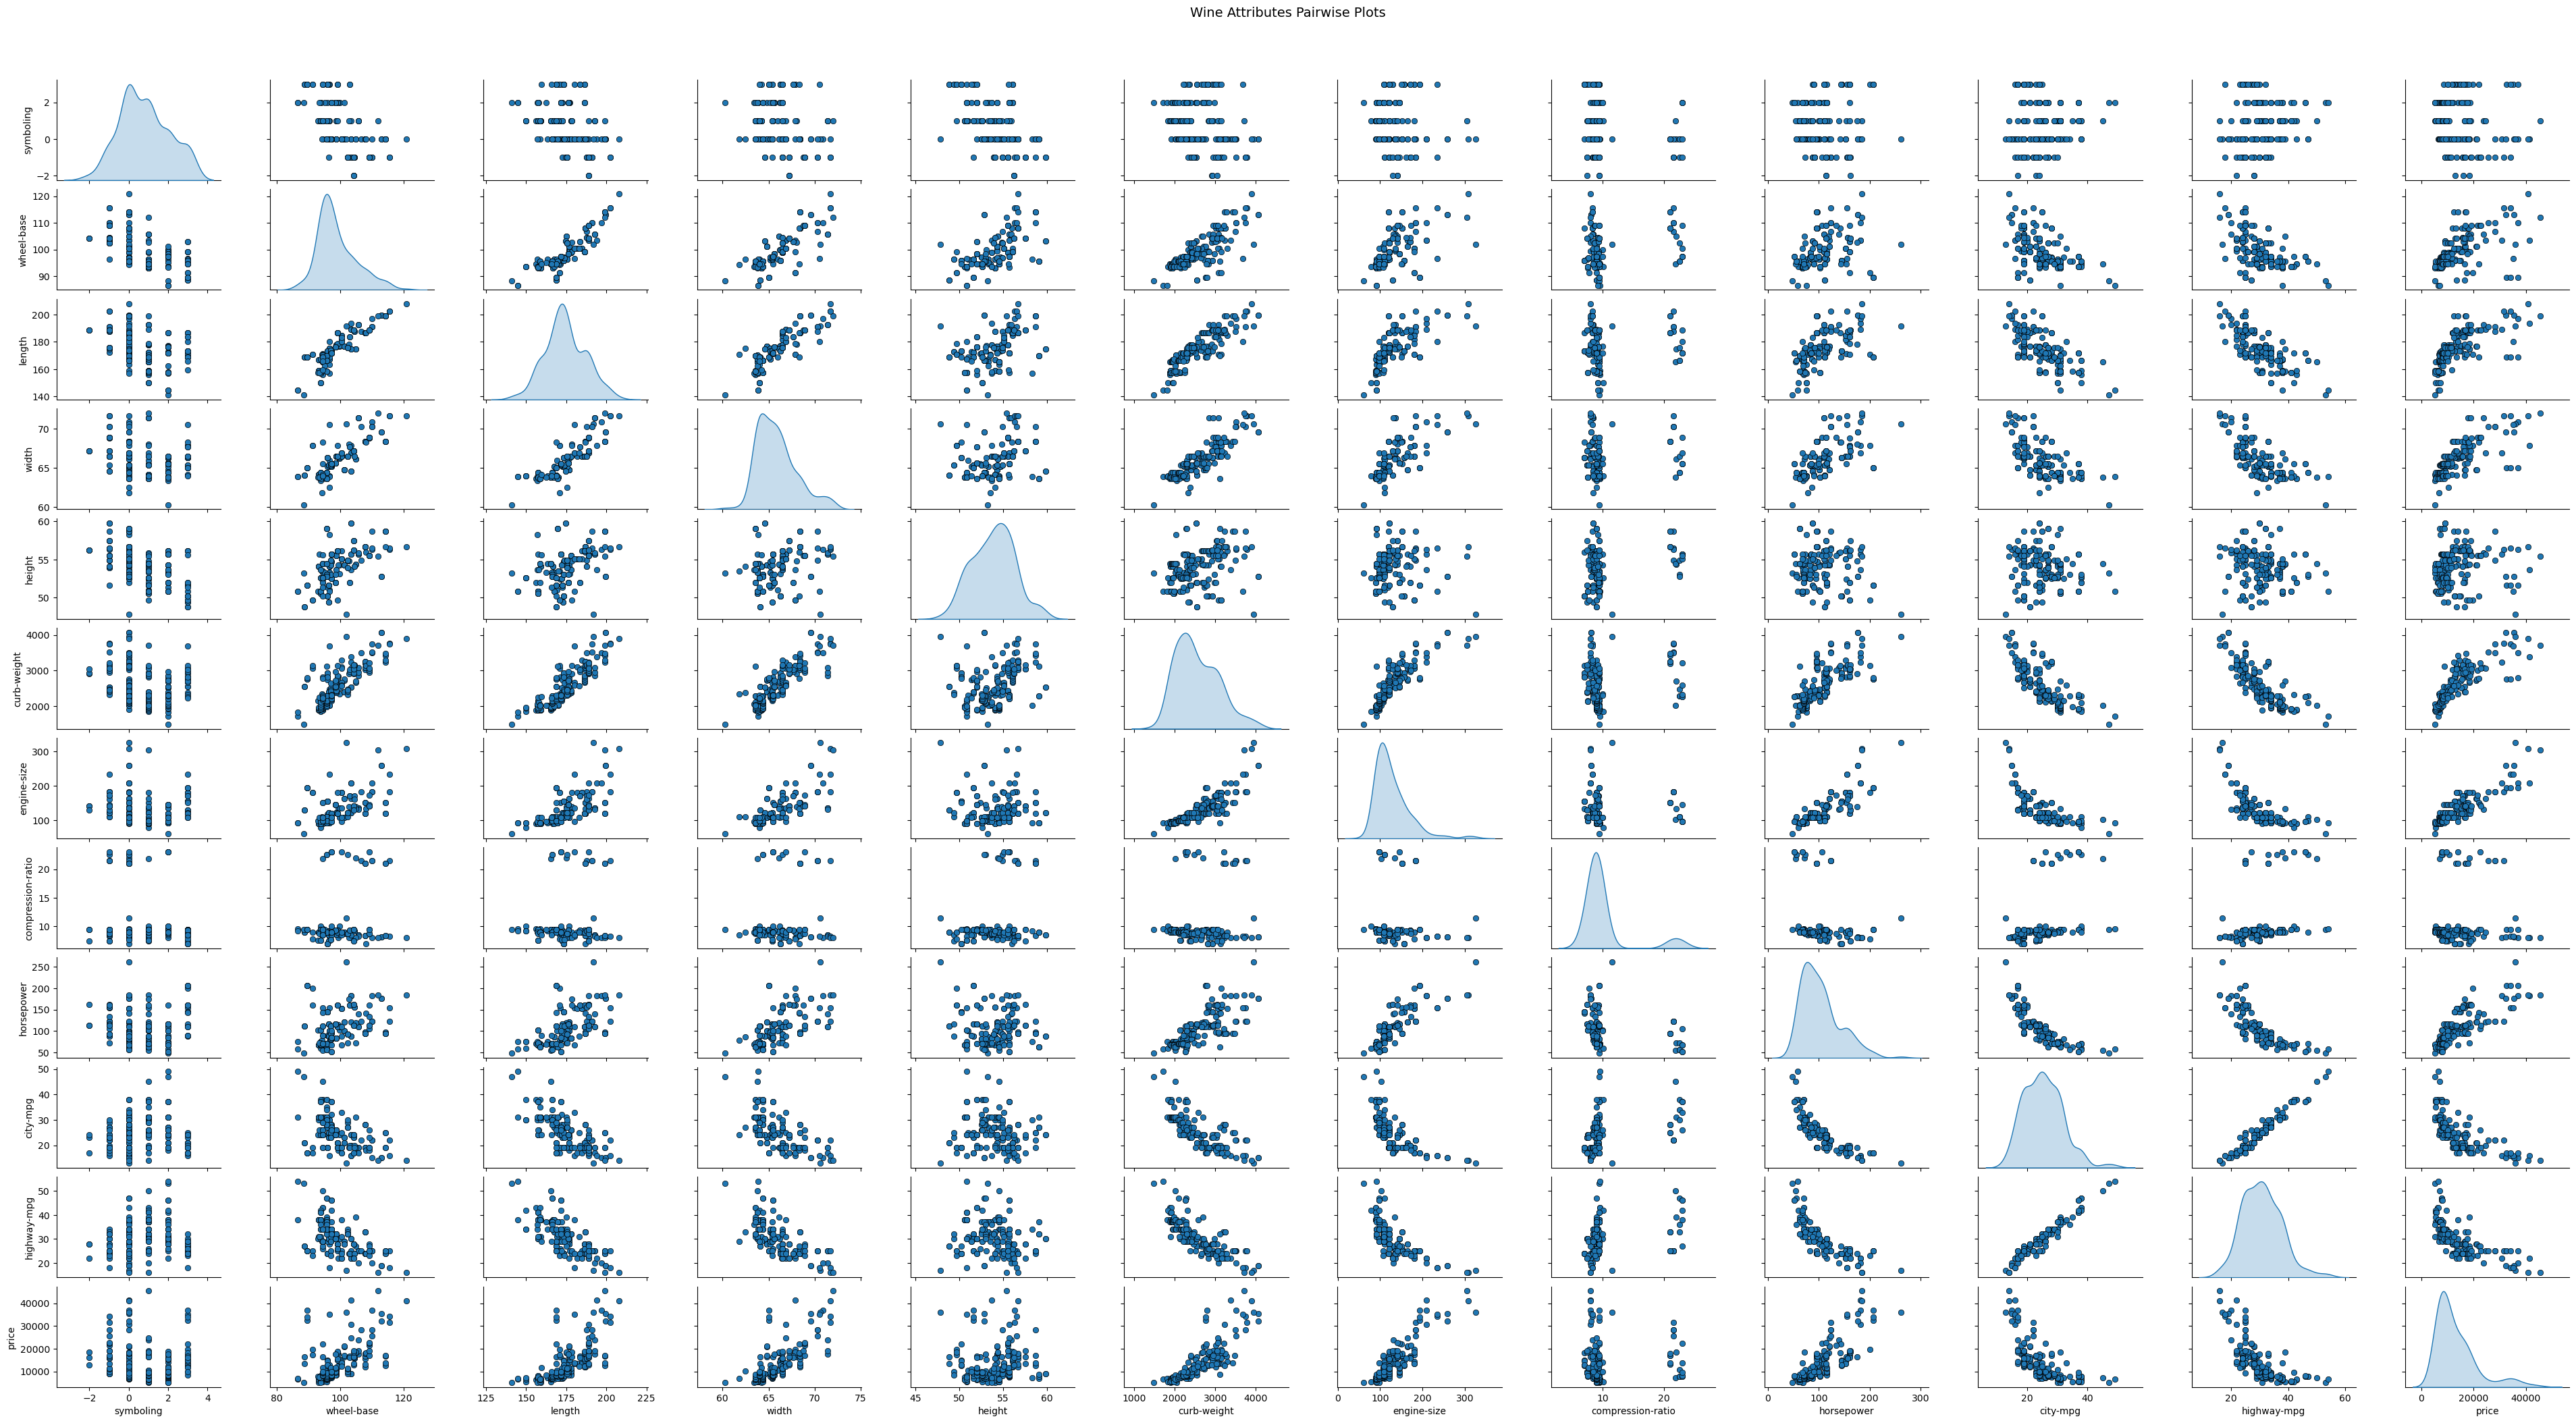

In [16]:
# Pair-wise Scatter Plots
pp = sns.pairplot(df, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)